In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from numpy import matlib
from scipy.optimize import fminbound, minimize, fsolve
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from datetime import date
#import winsound
from pylab import rcParams

# test *args **kwrags

In [6]:
def abc(a,b,*args,**kwargs):
    print(len(args))
    print(len(kwargs))
    for arg in args:
        
        print("another arg through *argv :", arg)
    for key in kwargs:
        print("another keyword arg: %s: %s" % (key, kwargs[key]))
    print("a = %s" %a)
    print("b = %s" %b)

In [9]:
abc(4, 'kak wa', 'aaaa', "args", 555, lol = 7, ab=5)

3
2
another arg through *argv : aaaa
another arg through *argv : args
another arg through *argv : 555
another keyword arg: lol: 7
another keyword arg: ab: 5
a = 4
b = kak wa


# PDF

In [4]:
from scipy.stats import chi2
import matplotlib.pyplot as plt


## normal chi

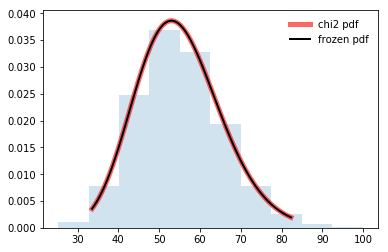

55.0401108001


In [31]:
fig, ax = plt.subplots(1, 1)
df = 55
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')

x = np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi2 pdf')

vals = chi2.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))

rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = chi2.rvs(df, size=10000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

print(r.mean())

## chi(1)

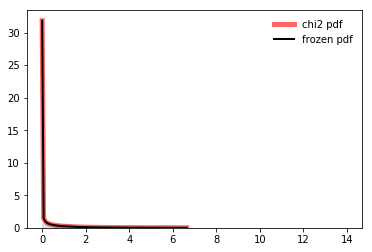

1.00648668523


In [32]:
fig, ax = plt.subplots(1, 1)
df = 1
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')

x = np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi2 pdf')

vals = chi2.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))

rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = chi2.rvs(df, size=10000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

print(r.mean())

## chi(2)

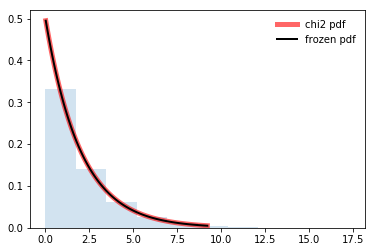

2.01673186069


In [33]:
fig, ax = plt.subplots(1, 1)
df = 2
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')

x = np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi2 pdf')

vals = chi2.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))

rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = chi2.rvs(df, size=10000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

print(r.mean())

## chi(3)

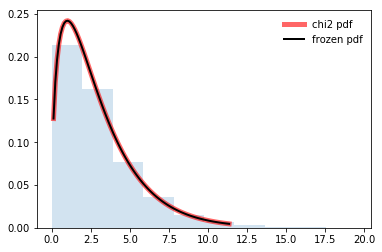

2.99627496628


In [28]:
fig, ax = plt.subplots(1, 1)
df = 3
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')

x = np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi2 pdf')

vals = chi2.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))

rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = chi2.rvs(df, size=10000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

print(r.mean())

## normal

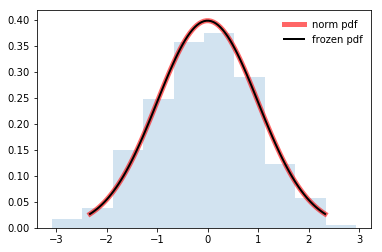

In [34]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

# Freeze the distribution and display the frozen pdf:
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

# generate random numbers
r = norm.rvs(size=1000)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [41]:
x

array([-2.32634787, -2.27935095, -2.23235402, -2.18535709, -2.13836017,
       -2.09136324, -2.04436631, -1.99736939, -1.95037246, -1.90337553,
       -1.85637861, -1.80938168, -1.76238475, -1.71538783, -1.6683909 ,
       -1.62139397, -1.57439705, -1.52740012, -1.48040319, -1.43340627,
       -1.38640934, -1.33941241, -1.29241549, -1.24541856, -1.19842163,
       -1.15142471, -1.10442778, -1.05743085, -1.01043393, -0.963437  ,
       -0.91644007, -0.86944314, -0.82244622, -0.77544929, -0.72845236,
       -0.68145544, -0.63445851, -0.58746158, -0.54046466, -0.49346773,
       -0.4464708 , -0.39947388, -0.35247695, -0.30548002, -0.2584831 ,
       -0.21148617, -0.16448924, -0.11749232, -0.07049539, -0.02349846,
        0.02349846,  0.07049539,  0.11749232,  0.16448924,  0.21148617,
        0.2584831 ,  0.30548002,  0.35247695,  0.39947388,  0.4464708 ,
        0.49346773,  0.54046466,  0.58746158,  0.63445851,  0.68145544,
        0.72845236,  0.77544929,  0.82244622,  0.86944314,  0.91

In [47]:
norm.pdf(x)

array([ 0.02665214,  0.0296985 ,  0.03302004,  0.03663206,  0.04054955,
        0.04478694,  0.049358  ,  0.05427559,  0.05955143,  0.06519596,
        0.07121803,  0.0776247 ,  0.08442105,  0.09160987,  0.09919153,
        0.1071637 ,  0.11552116,  0.12425566,  0.13335569,  0.14280642,
        0.1525895 ,  0.16268307,  0.17306164,  0.18369615,  0.19455396,
        0.20559893,  0.21679157,  0.22808919,  0.23944611,  0.25081392,
        0.26214179,  0.2733768 ,  0.28446433,  0.29534848,  0.30597253,
        0.3162794 ,  0.32621215,  0.33571453,  0.34473146,  0.35320956,
        0.36109774,  0.3683476 ,  0.37491403,  0.38075561,  0.38583507,
        0.39011967,  0.39358159,  0.39619817,  0.39795222,  0.39883215,
        0.39883215,  0.39795222,  0.39619817,  0.39358159,  0.39011967,
        0.38583507,  0.38075561,  0.37491403,  0.3683476 ,  0.36109774,
        0.35320956,  0.34473146,  0.33571453,  0.32621215,  0.3162794 ,
        0.30597253,  0.29534848,  0.28446433,  0.2733768 ,  0.26

In [43]:
norm.ppf(0.99)

2.3263478740408408

## verify normal

In [55]:
norm.pdf(2.3263478740408408)

0.02665214220345808

In [38]:
w_t = -5
s =1
pa = (2 * np.pi) ** (-0.5)
w_t = np.divide(pa * np.e ** (-0.5 * np.power(np.divide(w_t, s), 2)), s)
w_t = w_t + 10 ** -16
print(w_t)

1.48671951483e-06


In [10]:
df=1
print('PPF %f' %chi2.ppf(0.99,df))
print('PDF %f' %chi2.pdf(0.27,df))

PPF 6.634897
PDF 0.670808


In [29]:
df=1
print('PDF of %2.2f is %2.2f' %(0.1,chi2.pdf(0.1,df)))
print('PDF of %2.2f is %2.2f' %(0.5,chi2.pdf(0.5,df)))
print('PDF of %2.2f is %2.2f' %(1,chi2.pdf(1,df)))
print('PDF of %2.2f is %2.2f' %(1.2,chi2.pdf(1.2,df)))

PDF of 0.10 is 1.20
PDF of 0.50 is 0.44
PDF of 1.00 is 0.24
PDF of 1.20 is 0.20


In [30]:
df=2
print('PDF of %2.2f is %2.2f' %(0.1,chi2.pdf(2*0.1,df)))
print('PDF of %2.2f is %2.2f' %(0.5,chi2.pdf(2*0.5,df)))
print('PDF of %2.2f is %2.2f' %(1,chi2.pdf(2*1,df)))
print('PDF of %2.2f is %2.2f' %(1.2,chi2.pdf(2*1.2,df)))

PDF of 0.10 is 0.45
PDF of 0.50 is 0.30
PDF of 1.00 is 0.18
PDF of 1.20 is 0.15


In [31]:
df=2
print('PDF of %2.2f is %2.2f' %(0.1,chi2.pdf(0.1,df)))
print('PDF of %2.2f is %2.2f' %(0.5,chi2.pdf(0.5,df)))
print('PDF of %2.2f is %2.2f' %(1,chi2.pdf(1,df)))
print('PDF of %2.2f is %2.2f' %(1.2,chi2.pdf(1.2,df)))

PDF of 0.10 is 0.48
PDF of 0.50 is 0.39
PDF of 1.00 is 0.30
PDF of 1.20 is 0.27


In [35]:
x = np.array([[4 ,1],[0.1, 0.5]])
x

array([[ 4. ,  1. ],
       [ 0.1,  0.5]])

In [36]:
chi2.pdf(x,2)

array([[ 0.06766764,  0.30326533],
       [ 0.47561471,  0.38940039]])

# MSM